In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('all_tables2.csv')

In [3]:
df 

,result,table,_start,_stop,_time,_value,Time,_field,_measurement,applicationId,...,devAddr,devEui,deviceClassEnabled,deviceName,deviceProfileId,deviceProfileName,gatewayId,nsTime,tenantId,tenantName
0,_result,0,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 12:49:06.067459+00:00,1.0,2024-04-02T12:49:06.048715924+00:00,adr,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T12:49:05.832808333+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
1,_result,1,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 12:49:06.067459+00:00,1.0,2024-04-02T12:49:06.048715924+00:00,confirmed,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T12:49:05.832808333+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
2,_result,2,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 12:49:06.067459+00:00,18.0,2024-04-02T12:49:06.048715924+00:00,data_size,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T12:49:05.832808333+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
3,_result,3,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 12:49:06.067459+00:00,5.0,2024-04-02T12:49:06.048715924+00:00,dr,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T12:49:05.832808333+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
4,_result,4,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 12:49:06.067459+00:00,33425.0,2024-04-02T12:49:06.048715924+00:00,fCnt,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T12:49:05.832808333+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,_result,1877,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 13:29:01.774269+00:00,7.2,2024-04-02T13:29:01.535+00:00,rxInfo_snr,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T13:29:01.551941703+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
1878,_result,1878,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 13:29:01.774269+00:00,29669.0,2024-04-02T13:29:01.535+00:00,rxInfo_uplinkId,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T13:29:01.551941703+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
1879,_result,1879,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 13:29:01.774269+00:00,868500000.0,2024-04-02T13:29:01.535+00:00,txInfo_frequency,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T13:29:01.551941703+00:00,52f14cd4-c6f1-4fbd-8f87-4025e1d49242,ChirpStack
1880,_result,1880,2024-04-02 11:29:06.211761+00:00,2024-04-02 13:29:06.211761+00:00,2024-04-02 13:29:01.774269+00:00,125000.0,2024-04-02T13:29:01.535+00:00,txInfo_modulation_bandwidth,Uplink_data,9debbb59-d4d6-4306-8141-f25029222bca,...,00e58d09,0080e11500073358,CLASS_A,new_new_device,fa31de69-bdb7-4b51-b47f-0bd978be1603,susee_dev,7076ff005607214b,2024-04-02T13:29:01.551941703+00:00,52f14cd4-c6f1-4fbd-8f87-40

### Data merging
- The queried table from the influxDB is organized in such a way that the _field and their corresponding values are stored in seperate rows.
- But these are the outputs of the same JSON mqtt messages comming from the chirpstack. 
- Thus, it is desired to convert the _field rows into columns that stores the corresponding values based on the timestamps.
- We chose the _time column as the timestamp for the merger
- This is done in 3 steps
    - 1st a pivoted dataframe is generated converting the _field rows into columns 
    - Next the _field and _value columns are dropped and an intermediate DF is created
    - Finally, the 2 dataframes are merged with reference to the _time column. This merges the duplicate entries in the intermediate DF 

In [4]:
df_pivoted = df.pivot(index='_time', columns='_field', values='_value').reset_index()

In [5]:
df_droped = df.drop(columns=['_field', '_value'],axis=1)

In [6]:
df_mergeed = df_pivoted.merge(df_droped, on='_time')

print(df_mergeed)

                                 _time  adr  confirmed  data_size   dr  \
0     2024-04-02 12:49:06.067459+00:00  1.0        1.0       18.0  5.0   
1     2024-04-02 12:49:06.067459+00:00  1.0        1.0       18.0  5.0   
2     2024-04-02 12:49:06.067459+00:00  1.0        1.0       18.0  5.0   
3     2024-04-02 12:49:06.067459+00:00  1.0        1.0       18.0  5.0   
4     2024-04-02 12:49:06.067459+00:00  1.0        1.0       18.0  5.0   
...                                ...  ...        ...        ...  ...   
1877  2024-04-02 13:29:01.774269+00:00  1.0        1.0        7.0  5.0   
1878  2024-04-02 13:29:01.774269+00:00  1.0        1.0        7.0  5.0   
1879  2024-04-02 13:29:01.774269+00:00  1.0        1.0        7.0  5.0   
1880  2024-04-02 13:29:01.774269+00:00  1.0        1.0        7.0  5.0   
1881  2024-04-02 13:29:01.774269+00:00  1.0        1.0        7.0  5.0   

         fCnt  fPort  rxInfo_board  rxInfo_channel  rxInfo_location_altitude  \
0     33425.0   29.0           

In [7]:
df_mergeed.to_csv('merged_data.csv', index=0)

In [8]:
df_mergeed.columns

Index(['_time', 'adr', 'confirmed', 'data_size', 'dr', 'fCnt', 'fPort',
       'rxInfo_board', 'rxInfo_channel', 'rxInfo_location_altitude',
       'rxInfo_location_latitude', 'rxInfo_location_longitude', 'rxInfo_rssi',
       'rxInfo_snr', 'rxInfo_uplinkId', 'txInfo_frequency',
       'txInfo_modulation_bandwidth', 'txInfo_modulation_spreadingFactor',
       'result', 'table', '_start', '_stop', 'Time', '_measurement',
       'applicationId', 'applicationName', 'codeRate', 'crcStatus', 'devAddr',
       'devEui', 'deviceClassEnabled', 'deviceName', 'deviceProfileId',
       'deviceProfileName', 'gatewayId', 'nsTime', 'tenantId', 'tenantName'],
      dtype='object')

In [9]:
df_mergeed.describe()

,adr,confirmed,data_size,dr,fCnt,fPort,rxInfo_board,rxInfo_channel,rxInfo_location_altitude,rxInfo_location_latitude,rxInfo_location_longitude,rxInfo_rssi,rxInfo_snr,rxInfo_uplinkId,txInfo_frequency,txInfo_modulation_bandwidth,txInfo_modulation_spreadingFactor,table
count,1882.0,1882.0,1882.000000,1882.000000,1882.000000,1882.000000,1717.000000,1717.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1.882000e+03,1882.0,1882.000000,1882.000000
mean,1.0,1.0,16.135494,4.972901,32579.555792,27.298618,92.495050,3.782178,374.249203,50.813925,12.928056,-60.556854,9.230871,32692.401700,8.677901e+08,125000.0,7.027099,940.500000
std,0.0,0.0,4.858358,0.283910,5437.368837,4.449503,123.518496,1.943331,68.883556,0.000846,0.000486,5.880179,1.096604,20598.677688,4.284885e+05,0.0,0.283910,543.430922
min,1.0,1.0,7.000000,2.000000,8.000000,2.000000,1.000000,1.000000,51.000000,50.812042,12.926670,-96.000000,6.500000,229.000000,8.671000e+08,125000.0,7.000000,0.000000
25%,1.0,1.0,18.000000,5.000000,33457.000000,27.000000,2.000000,2.000000,365.000000,50.813915,12.927898,-61.000000,8.800000,14309.000000,8.675000e+08,125000.0,7.000000,470.250000
50%,1.0,1.0,18.000000,5.000000,33486.000000,28.000000,4.000000,4.000000,378.000000,50.814079,12.927999,-60.000000,9.500000,27109.000000,8.677000e+08,125000.0,7.000000,940.500000
75%,1.0,1.0,18.000000,5.000000,33513.000000,29.000000,262.000000,6.000000,390.000000,50.814327,12.928128,-59.000000,10.000000,52452.000000,8.681000e+08,125000.0,7.000000,1410.750000
max,1.0,1.0,29.000000,5.000000,33541.000000,30.000000,263.000000,7.000000,482.000000,50.815605,12.929186,-53.000000,11.200000,65508.000000,8.685000e+08,125000.0,10.000000,1881.000000


<Axes: xlabel='rxInfo_location_latitude', ylabel='rxInfo_location_longitude'>

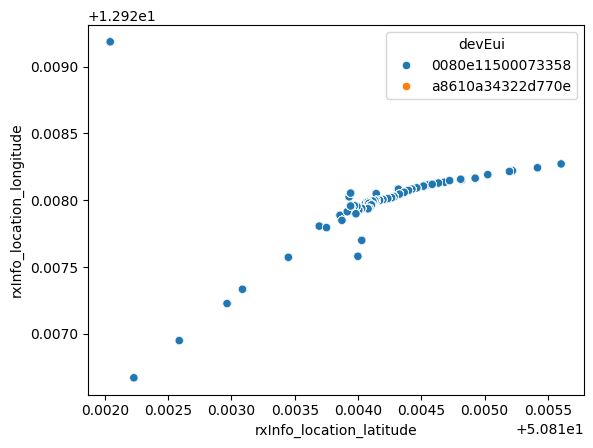

In [10]:
import seaborn as sns

sns.scatterplot(data=df_mergeed, x=df_mergeed['rxInfo_location_latitude'], y=df_mergeed['rxInfo_location_longitude'], hue=df_mergeed['devEui'])

<Axes: xlabel='Time', ylabel='rxInfo_location_latitude'>

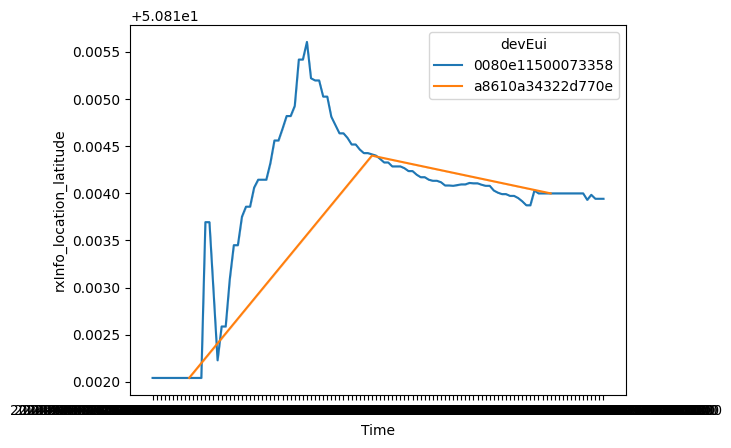

In [11]:
sns.lineplot(data=df_mergeed, x=df_mergeed['Time'], y=df_mergeed['rxInfo_location_latitude'], hue=df_mergeed['devEui'])

<Axes: xlabel='None', ylabel='None'>

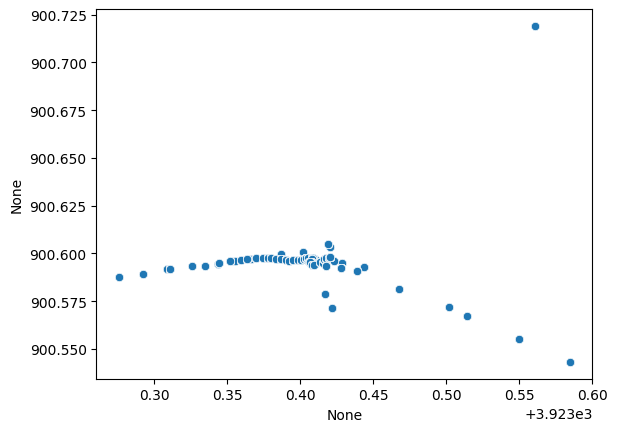

In [12]:
import numpy as np

lat, lon = np.deg2rad(df_mergeed['rxInfo_location_latitude']), np.deg2rad(df_mergeed['rxInfo_location_longitude'])
R = 6371  # Approximate radius of the Earth in kilometers (adjust as needed)
x = R * np.cos(lat) * np.cos(lon)
y = R * np.cos(lat) * np.sin(lon)

sns.scatterplot(data=df_mergeed, x=x, y=y)

In [ ]:
import plotly.express as px
import pandas as pd


# df_mergeed.dropna(
#     axis=0,
#     how='any',
#     thresh=None,
#     subset=None,
#     inplace=True
# )

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_mergeed, 
                        lat='rxInfo_location_latitude', 
                        lon='rxInfo_location_longitude', 
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

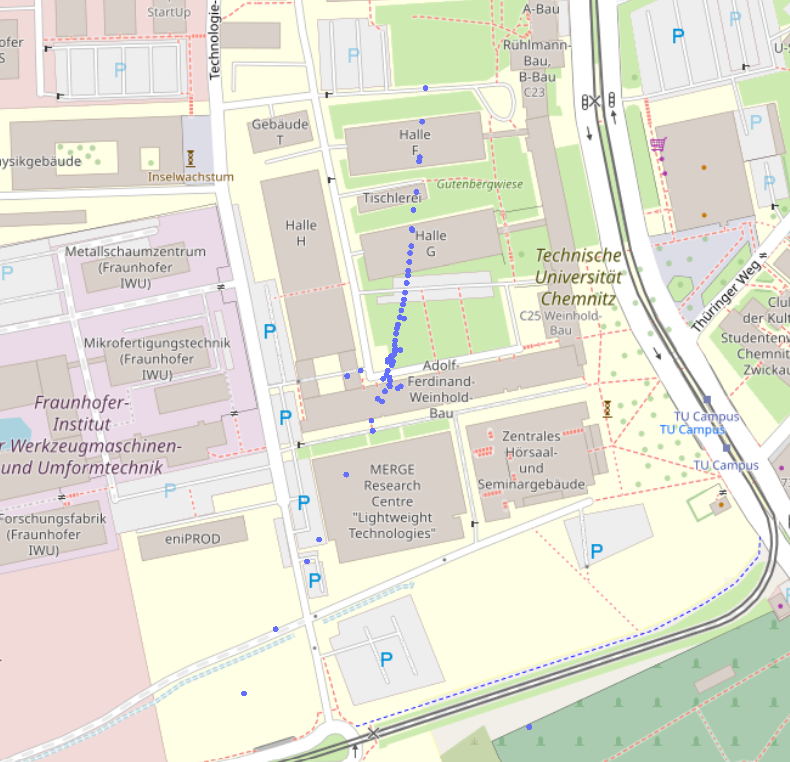